# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [62]:
data = pd.read_csv('SINASC_RO_2019-Copy1.csv')
data.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [63]:
data.columns = [coluna.lower() for coluna in data.columns]

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [64]:
data.groupby('munresnome')[['idademae', 'idadepai']].mean().head()

,idademae,idadepai
munresnome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [65]:
data[['escmae', 'peso', 'sexo', 'dtnasc']]\
.loc[data['dtnasc'] == '2019-01-10'].groupby(['escmae', 'sexo']).mean(numeric_only=True)

peso
escmae          sexo                  
1 a 3 anos      Feminino   3651.000000
                Masculino  3078.333333
12 anos ou mais Feminino   3351.111111
                Masculino  3015.428571
4 a 7 anos      Feminino   3152.375000
                Masculino  3105.000000
8 a 11 anos     Feminino   3120.909091
                Masculino  3497.550000

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [66]:
def Visualizar_dados(data:pd.DataFrame, title):
    f, ax = plt.subplots(1, 1, figsize=(5, 5))
    data.plot.bar(ax=ax)
    
    ax.set_title(title[0], size=13)
    ax.set_ylabel(title[1], size=13)
    ax.set_xlabel(title[2], size=13)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

    plt.show()

- #### Agrupando por município com menos bebês

In [67]:
municipios = data.groupby('munresnome')['idademae'].count().to_frame()
municipios = municipios.sort_values(by='idademae').drop('Município ignorado - RO', axis=0)
# Estou dropando o município ignorado por não conter muita informação.

In [68]:
municipios.head()

,idademae
munresnome,
Castanheiras,32
Pimenteiras do Oeste,40
Primavera de Rondônia,43
Parecis,44
Rio Crespo,50


- Visualizando a Idade média maxima e minima das mães

In [69]:
municipio_castanheiras = data[data['munresnome'] == 'Castanheiras']

In [70]:
idade_maes = municipio_castanheiras.groupby('munresnome')['idademae'].agg([np.mean, max, min])

In [71]:
idade_maes

,mean,max,min
munresnome,,,
Castanheiras,27.28125,39,17


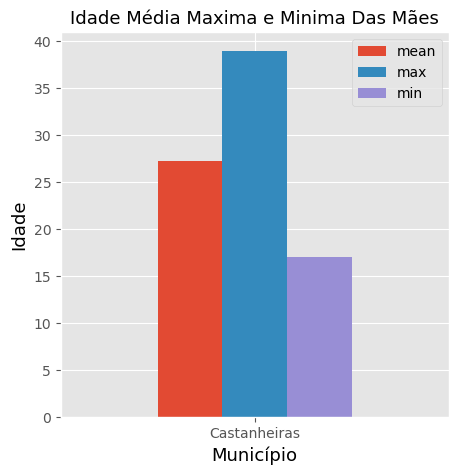

In [72]:
titulos_maes = ['Idade Média Maxima e Minima Das Mães', 'Idade', 'Município']
Visualizar_dados(idade_maes, titulos_maes)

- Visualizendo idade média maxima e minima dos pais

In [73]:
idade_pais = municipio_castanheiras.groupby('munresnome')['idadepai'].agg([np.mean, max, min])
idade_pais

,mean,max,min
munresnome,,,
Castanheiras,30.392857,43.0,17.0


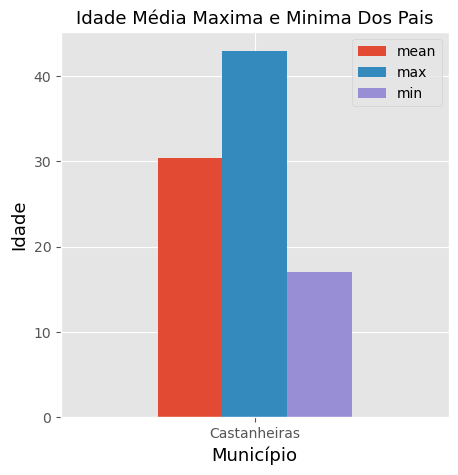

In [74]:
titulos_pais = ['Idade Média Maxima e Minima Dos Pais', 'Idade', 'Município']
Visualizar_dados(idade_pais, titulos_pais)

####  3)
- #### 1 insigt:
- **Municipio com menos bebês nascidos**
- Castanheiras
- #### 2 insigt:
- **A idade media, maxima e minima das mães do municipio Castanheiras são.** 
- media 27 anos, maxima 39 anos, minima 17 anos**
- #### 3 insigt:
- **A idade media, maxima e minima dos pais do municipio Castanheiras.**
- media 30 anos, maxima 43 anos, minima 17 anos**

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



- Filtrando por município que nasceu mais bebe no mês de março.

In [75]:
data['dtnasc'] = pd.to_datetime(data['dtnasc'])

In [76]:
data.set_index('dtnasc', inplace=True)

In [77]:
data['mes'] = data.index.month

In [78]:
data.loc[data['mes'] == 3].groupby('munresnome')['idademae'].count().\
sort_values(ascending=False).head()

munresnome
Porto Velho    744
Ji-Paraná      188
Vilhena        148
Ariquemes      141
Cacoal         133
Name: idademae, dtype: int64

- Visualizando a quantidade de filhos vivos media, maxima, minima.

In [79]:
qtd_filvivo = data[data['munresnome'] == 'Porto Velho'].groupby('munresnome')\
['qtdfilvivo'].agg([np.mean, max, min])

In [80]:
qtd_filvivo

,mean,max,min
munresnome,,,
Porto Velho,1.167236,12.0,0.0


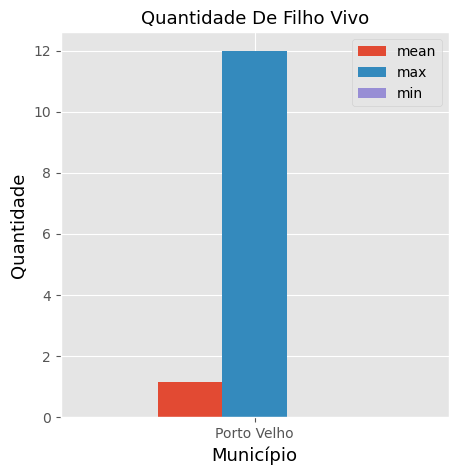

In [81]:
titulos_qtd_filvivo = ['Quantidade De Filho Vivo', 'Quantidade', 'Município']
Visualizar_dados(qtd_filvivo, titulos_qtd_filvivo)

- Visualizando a idade média Maxima e minima dos pais nesse Município

In [82]:
idade_pais_portovelho = data[data['munresnome'] == 'Porto Velho'].groupby('munresnome')['idadepai'].agg([np.mean, max, min])

In [83]:
idade_pais_portovelho

,mean,max,min
munresnome,,,
Porto Velho,32.352679,65.0,16.0


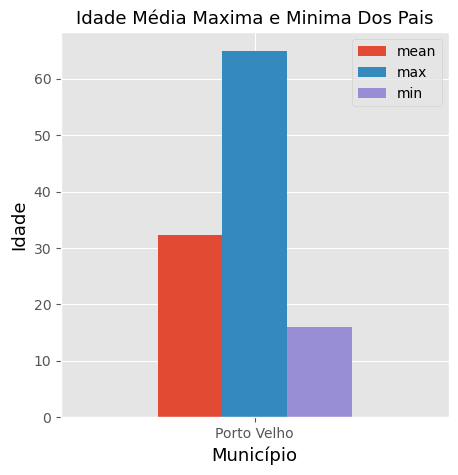

In [84]:
titulos_pais_portovelho = ['Idade Média Maxima e Minima Dos Pais', 'Idade', 'Município']
Visualizar_dados(idade_pais_portovelho, titulos_pais_portovelho)

####  4)
- #### 1 insigt:
- **Municipio que nasceu mais bebês**
- Porto velho
- #### 2 insigt:
- **Quantidade de filhos vivos media, maxima, minima nesse municipio**
- Média 1.167236, maxímo 12, minímo 0
- #### 3 insigt:
- **A idade media, maxima e minima dos pais do municipio Porto Velho.**
- media 32 anos, maxima 65 anos, minima 16 anos

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

- ### Insight interessante.
- A idade Maxima dos pais do município de Castanheiras é de 43 anos.
Enquanto a idade maxima do município de porto velho é entre 65 anos
- Mas em comparação com a media e com minima não vemos muita diferença, para os dois municipios.


In [85]:
data.select_dtypes(exclude=['int64','float64']).head()

,escmae,gestacao,gravidez,parto,sexo,racacor,dtcadastro,codanomal,versaosist,dtrecebim,munresstatus,munrestipo,munresnome,munresuf
dtnasc,,,,,,,,,,,,,,
2019-02-19,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2019-02-21,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2019-02-25,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2019-03-20,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
2019-03-23,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia


- **Visualizando outros dados**

In [86]:
data['parto'].dropna().unique()

array(['Cesáreo', 'Vaginal'], dtype=object)

In [87]:
# Filtrando por municípios e parto por Cesáreo
cesareo = data.loc[data['parto'] == 'Cesáreo'].groupby(['munresnome', 'parto'])['sexo'].count()\
.to_frame().sort_values(by='sexo', ascending=False).head()

cesareo.columns = ['Frequência']
cesareo

,,Frequência
munresnome,parto,
Porto Velho,Cesáreo,4701
Ji-Paraná,Cesáreo,1383
Vilhena,Cesáreo,1199
Ariquemes,Cesáreo,1176
Cacoal,Cesáreo,1113


In [88]:
# Filtrando por municípios e parto vaginal
vaginal = data.loc[data['parto'] == 'Vaginal'].groupby(['munresnome', 'parto'])['sexo'].count()\
.to_frame().sort_values(by='sexo', ascending=False).head()

vaginal.columns = ['Frequência']
vaginal

,,Frequência
munresnome,parto,
Porto Velho,Vaginal,3709
Ji-Paraná,Vaginal,793
Ariquemes,Vaginal,553
Guajará-Mirim,Vaginal,478
Vilhena,Vaginal,391


In [89]:
def municipios_x_parto(data:pd.DataFrame, title):
    f, ax = plt.subplots(2, 1, figsize=(8, 5))
    axes = 0
    
    for df in data:
        df = df.sort_values(by='Frequência')
        df.plot.barh(ax=ax[axes])

        ax[axes].set_title(title[axes])
        ax[axes].set_ylabel('Municípios')
        ax[axes].set_xlabel('')
        
        axes += 1

    plt.tight_layout()
    plt.show()

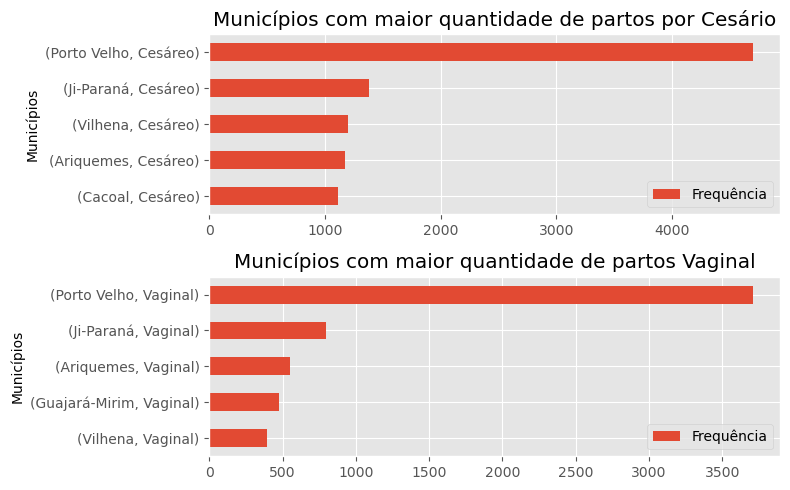

In [90]:
titulos =['Municípios com maior quantidade de partos por Cesário'\
          , 'Municípios com maior quantidade de partos Vaginal']

dataframes = [cesareo, vaginal]
municipios_x_parto(dataframes, titulos)

- **insight.**
- Município que teve a maior quantidade de partos por cesário foi **porto velho**,
E também foi o municipio que teve a maior quantidade de partos vaginais.